In [1]:
import ROOT
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('science')

Welcome to JupyROOT 6.22/06


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-18icp3db because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
tpost = uproot.open("/volatile/clas12/users/gmat/clas12analysis.sidis.data/rga/MC/testall/merged_run.root:tree_postprocess")
parentPID1 = tpost["parentPID1"].array(library="np")
parentPID2 = tpost["parentPID2"].array(library="np")
PID1 = tpost["PID1"].array(library="np")
PID2 = tpost["PID2"].array(library="np")
Mdiphoton = tpost["Mdiphoton"].array(library="np")
flag = tpost["flag"].array(library="np")
parentpids,parentcounts=np.unique(parentPID1,return_counts=True)
pids,counts=np.unique(PID1,return_counts=True)
n = len(parentpids)
# Sort by counts
tmp = parentcounts.argsort()
parentpids=parentpids[tmp[::-1]]
parentcounts=parentcounts[tmp[::-1]]
tmp = counts.argsort()
pids=pids[tmp[::-1]]
counts=counts[tmp[::-1]]
# Only consider top 3
parentpids=parentpids[:3]
parentcounts=parentcounts[:3]
pids=pids[:3]
counts=counts[:3]

In [3]:
def latex_from_pid(pid):
    if(pid==-999):
        return "???"
    elif(pid==111):
        return '$\pi^{0}$'
    elif(pid==221):
        return '$\eta$'
    elif(pid==22):
        return "$\gamma$"
    elif(pid==130):
        return "$K_L^{0}$"
    else:
        return pid

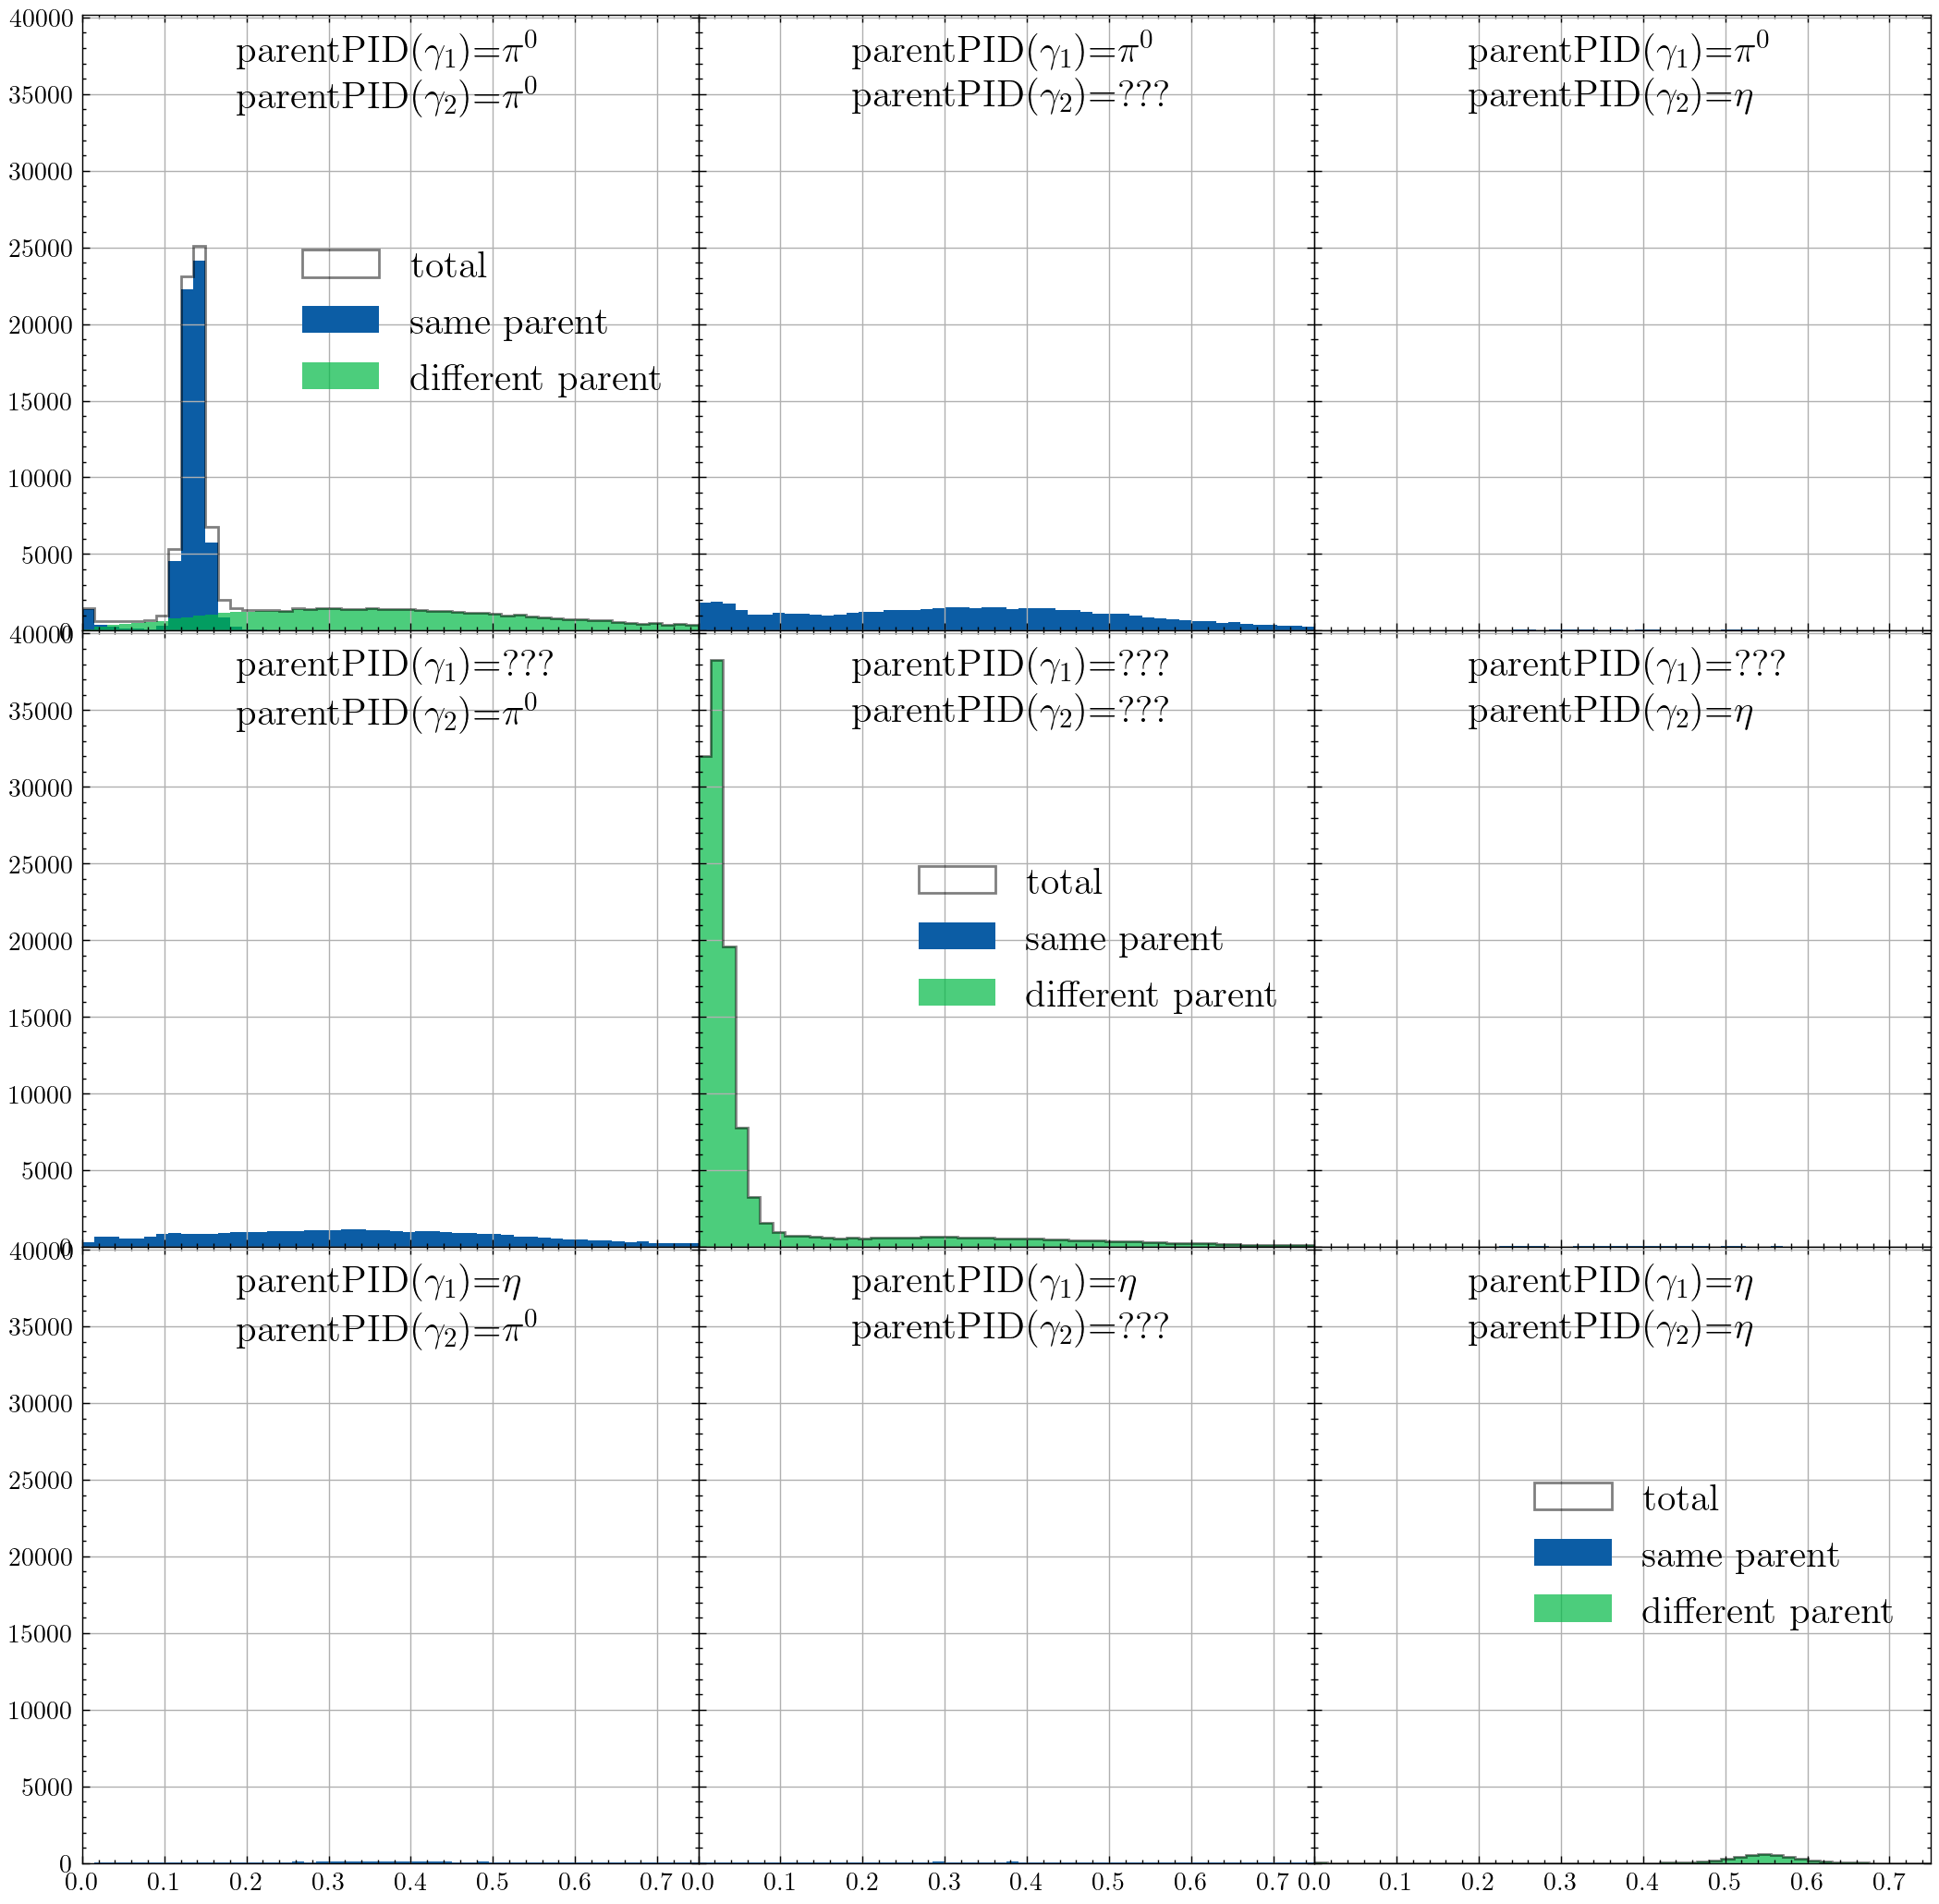

In [5]:
fig,axs=plt.subplots(3,3,sharex=True, sharey=True,figsize=(10,10),dpi=200)
fig.subplots_adjust(0,0,1,1,0,0)
lims=(0,0.75)
for r in range(3):
    for c in range(3):
        idx = r*3+c
        pidA = parentpids[r]
        pidB = parentpids[c]
        b = (parentPID1==pidA)*(parentPID2==pidB)
        if(r==c):
            axs[r,c].hist(Mdiphoton[b],bins=50,label="total",color="k",alpha=0.5,histtype=u'step',range=lims)
            axs[r,c].hist(Mdiphoton[(b) & (flag==1)],bins=50,label="same parent",alpha=1,range=lims)
            axs[r,c].hist(Mdiphoton[(b) & (flag==-1)],bins=50,label="different parent",alpha=0.7,range=lims)
            axs[r,c].legend(fontsize=15,loc='center right')
        else:
            axs[r,c].hist(Mdiphoton[b],bins=50,range=lims)
        axs[r,c].annotate(r'parentPID($\gamma_1$)={}'.format(latex_from_pid(pidA)),
            xy=(.25, .975), xycoords='axes fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15)
        axs[r,c].annotate(r'parentPID($\gamma_2$)={}'.format(latex_from_pid(pidB)),
            xy=(.25, .9), xycoords='axes fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15)
        axs[r,c].grid()
        axs[r,c].set_xlim(lims[0],lims[1])

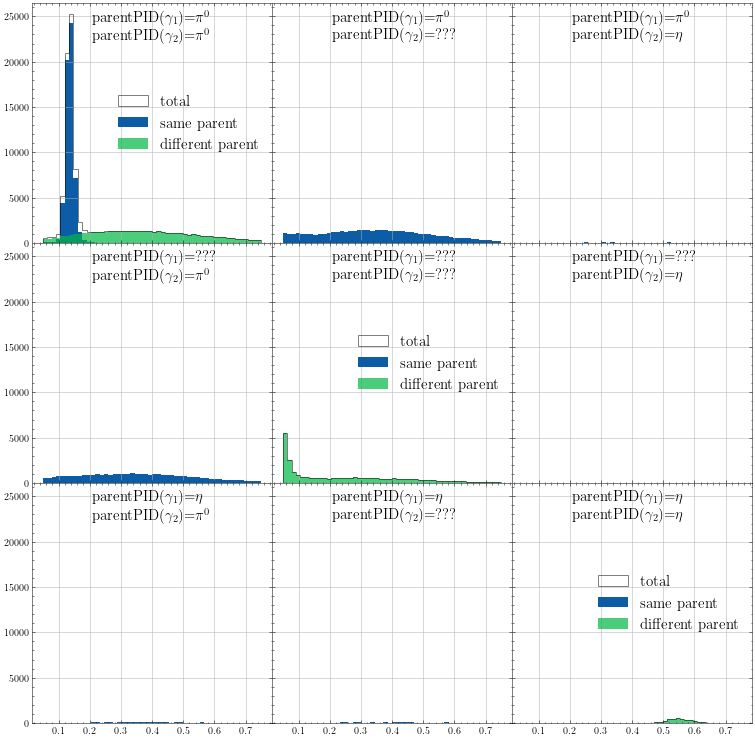

In [6]:
fig,axs=plt.subplots(3,3,sharex=True, sharey=True,figsize=(10,10))
fig.subplots_adjust(0,0,1,1,0,0)
lims=(0.05,0.75)
for r in range(3):
    for c in range(3):
        idx = r*3+c
        pidA = parentpids[r]
        pidB = parentpids[c]
        b = (parentPID1==pidA)*(parentPID2==pidB)
        if(r==c):
            axs[r,c].hist(Mdiphoton[b],bins=50,label="total",color="k",alpha=0.5,histtype=u'step',range=lims)
            axs[r,c].hist(Mdiphoton[(b) & (flag==1)],bins=50,label="same parent",alpha=1,range=lims)
            axs[r,c].hist(Mdiphoton[(b) & (flag==-1)],bins=50,label="different parent",alpha=0.7,range=lims)
            axs[r,c].legend(fontsize=15,loc='center right')
        else:
            axs[r,c].hist(Mdiphoton[b],bins=50,range=lims)
        axs[r,c].annotate(r'parentPID($\gamma_1$)={}'.format(latex_from_pid(pidA)),
            xy=(.25, .975), xycoords='axes fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15)
        axs[r,c].annotate(r'parentPID($\gamma_2$)={}'.format(latex_from_pid(pidB)),
            xy=(.25, .9), xycoords='axes fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15)
        axs[r,c].grid()

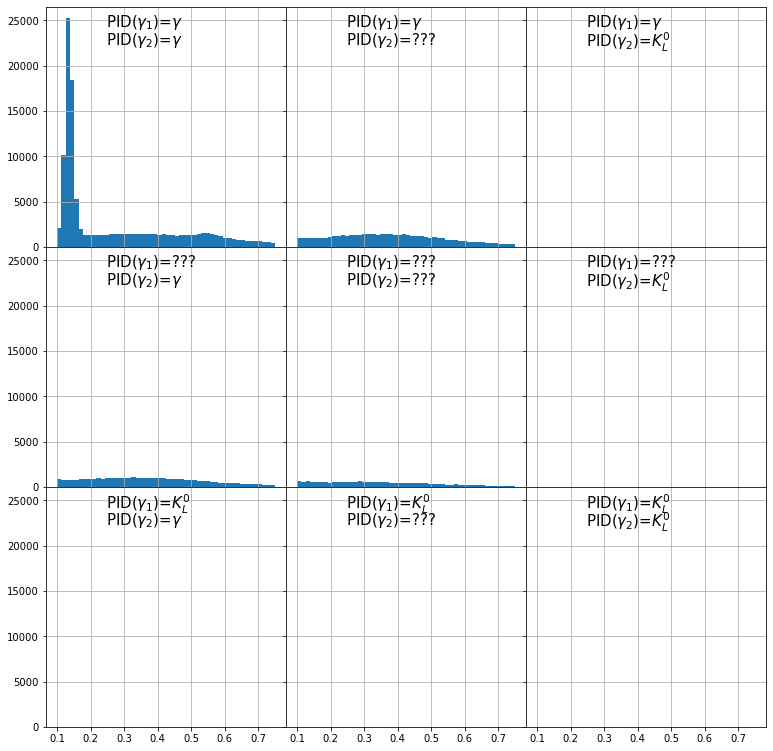

In [20]:
fig,axs=plt.subplots(3,3,sharex=True, sharey=True,figsize=(10,10))
fig.subplots_adjust(0,0,1,1,0,0)
lims=(0.1,0.75)
for r in range(3):
    for c in range(3):
        idx = r*3+c
        pidA = pids[r]
        pidB = pids[c]
        b = (PID1==pidA)*(PID2==pidB)
        #if(r==c):
            #axs[r,c].hist(Mdiphoton[b],bins=50,label="total",color="k",alpha=0.5,histtype=u'step',range=lims)
            #axs[r,c].hist(Mdiphoton[(b) & (flag==1)],bins=50,label="same parent",alpha=1,range=lims)
            #axs[r,c].hist(Mdiphoton[(b) & (flag==-1)],bins=50,label="different parent",alpha=0.7,range=lims)
            #axs[r,c].legend(fontsize=15,loc='center right')
        #else:
            #axs[r,c].hist(Mdiphoton[b],bins=50,range=lims)
        axs[r,c].hist(Mdiphoton[b],bins=50,range=lims)
        axs[r,c].annotate(r'PID($\gamma_1$)={}'.format(latex_from_pid(pidA)),
            xy=(.25, .975), xycoords='axes fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15)
        axs[r,c].annotate(r'PID($\gamma_2$)={}'.format(latex_from_pid(pidB)),
            xy=(.25, .9), xycoords='axes fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15)
        axs[r,c].grid()